# Kelompok 2

  1. Faiz Rofi Hencya (1301190230)
  2. Rifqiandi Cesario Putra (1301190350)



# **Tugas Besar Matakuliah Pembelajaran Mesin Semester Ganjil 2021-2022**

# Part 2: Classification memakai 

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from google.colab import files

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

## **1. Eksplorasi Data**

### **Membaca data**

#### Data Train

In [ ]:
#Membaca dataset train

#Membaca dataset "train" dengan ekstensi csv ke variabel "df_train"
df_train = pd.read_csv('https://github.com/Hencya/Tubes_Machine_Learning_Tahap_2/blob/main/data_kendaraan_train.csv?raw=true')

# Menampilkan Data sample train
df_train.sample(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
134676,134677,Wanita,26.0,1.0,NaN,1.0,< 1 Tahun,Tidak,35933.0,152.0,104.0,0
169584,169585,Pria,49.0,1.0,41.0,0.0,NaN,Pernah,32209.0,26.0,275.0,1
10750,10751,Pria,22.0,1.0,46.0,1.0,< 1 Tahun,Tidak,23810.0,152.0,220.0,0
122742,122743,Wanita,28.0,1.0,18.0,0.0,< 1 Tahun,Pernah,31512.0,152.0,256.0,0
84395,84396,Pria,48.0,1.0,7.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,105.0,0
3461,3462,Pria,39.0,1.0,3.0,1.0,1-2 Tahun,Tidak,28930.0,152.0,148.0,0
234715,234716,Wanita,25.0,1.0,50.0,0.0,< 1 Tahun,Tidak,2630.0,152.0,19.0,0
21290,21291,Pria,24.0,1.0,46.0,0.0,NaN,Tidak,2630.0,1.0,260.0,0
95102,95103,Wanita,56.0,1.0,28.0,0.0,1-2 Tahun,NaN,38086.0,122.0,151.0,0
146878,146879,Pria,25.0,1.0,41.0,1.0,< 1 Tahun,Tidak,25038.0,152.0,110.0,0


#### Data Test

In [ ]:
#Membaca dataset test

#Membaca dataset "test" dengan ekstensi csv ke variabel "df_test"
df_test = pd.read_csv('https://github.com/Hencya/Tubes_Machine_Learning_Tahap_2/blob/main/kendaraan_test.csv?raw=true')
# Menampilkan Data sample test
df_test.sample(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
39544,Pria,49,1,8,0,1-2 Tahun,Pernah,37502,26,129,0
26035,Wanita,27,1,30,0,< 1 Tahun,Tidak,24339,152,88,1
4765,Pria,27,1,46,1,< 1 Tahun,Tidak,30237,152,160,0
32959,Pria,62,1,28,0,1-2 Tahun,Pernah,43268,26,113,0
46678,Wanita,54,1,28,1,1-2 Tahun,Pernah,37509,26,31,0
15301,Pria,26,1,15,0,< 1 Tahun,Tidak,26008,152,219,0
36030,Pria,70,1,15,0,1-2 Tahun,Pernah,51460,14,245,0
15125,Pria,43,1,48,0,1-2 Tahun,Tidak,2630,124,114,0
1742,Wanita,24,1,8,1,< 1 Tahun,Tidak,42625,152,77,0
10529,Wanita,48,1,11,1,1-2 Tahun,Tidak,35722,120,90,0


### **Melihat info data**

#### Data Train

In [ ]:
#Melihat info data
df_train.info()
print("\nDataframe kendaraan_train memiliki",df_train.shape[0],"baris dan memiliki", df_train.shape[1],"Kolom")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB

Dataframe kendaraan_train memiliki 285831 baris dan memiliki 12 Kolom


#### Data test

In [ ]:
#Melihat info data
df_test.info()
print("\nDataframe kendaraan_train memiliki",df_test.shape[0],"baris dan memiliki", df_test.shape[1],"Kolom")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB

Dataframe kendaraan_train memiliki 47639 baris dan memiliki 11 Kolom


### **Melihat deskripsi data**



#### Data Train

In [ ]:
#Melihat deskripsi data
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Data Test

In [ ]:
#Melihat deskripsi data
df_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### **Cek duplicate data set**

#### Data Train

In [ ]:
# Cek duplicate data set
print('Banyak nya data duplicate pada dataset train : ', df_train[df_train.duplicated()].shape)

duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Banyak nya data duplicate pada dataset train :  (0, 12)
Data Duplikasi : 0


#### Data Test

In [ ]:
# Cek duplicate data set
print('Banyak nya data duplicate pada dataset test : ', df_test[df_test.duplicated()].shape)

duplicate = list(df_test.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Banyak nya data duplicate pada dataset test :  (3, 11)
Data Duplikasi : 3


### **Cek Jumlah data tipe categorical**

#### **Data Train**

Umur Kendaraan

In [ ]:
df_train['Umur_Kendaraan'].value_counts()

1-2 Tahun    142761
< 1 Tahun    117378
> 2 Tahun     11417
Name: Umur_Kendaraan, dtype: int64

kendaraan Rusak

In [ ]:
df_train['Kendaraan_Rusak'].value_counts()

Pernah    137123
Tidak     134520
Name: Kendaraan_Rusak, dtype: int64

SIM

In [ ]:
df_train['SIM'].value_counts()

1.0    270843
0.0       584
Name: SIM, dtype: int64

Sudah Asuransi

In [ ]:
df_train['Sudah_Asuransi'].value_counts()

0.0    146997
1.0    124605
Name: Sudah_Asuransi, dtype: int64

#### **Data Test**

Umur Kendaraan

In [ ]:
df_test['Umur_Kendaraan'].value_counts()

1-2 Tahun    24966
< 1 Tahun    20692
> 2 Tahun     1981
Name: Umur_Kendaraan, dtype: int64

kendaraan Rusak

In [ ]:
df_test['Kendaraan_Rusak'].value_counts()

Pernah    24041
Tidak     23598
Name: Kendaraan_Rusak, dtype: int64

SIM

In [ ]:
df_test['SIM'].value_counts()

1    47540
0       99
Name: SIM, dtype: int64

Sudah Asuransi

In [ ]:
df_test['Sudah_Asuransi'].value_counts()

0    25839
1    21800
Name: Sudah_Asuransi, dtype: int64

### **Check missing value**

#### Data Train

In [ ]:
#Mengecek Missing Value dan presentasenya
percent_missing = df_train.isnull().sum() * 100 / len(df_train)

print("\n---Jumlah Missing Value---")
print(df_train.isna().sum())
print("\n----------Presentase---------")
print(percent_missing)


---Jumlah Missing Value---
id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

----------Presentase---------
id                   0.000000
Jenis_Kelamin        5.051936
Umur                 4.972869
SIM                  5.039341
Kode_Daerah          5.005055
Sudah_Asuransi       4.978116
Umur_Kendaraan       4.994210
Kendaraan_Rusak      4.963772
Premi                5.097068
Kanal_Penjualan      5.002606
Lama_Berlangganan    4.895200
Tertarik             0.000000
dtype: float64


#### Data Test

In [ ]:
#Mengecek Missing Value dan presentasenya
percent_missing = df_test.isnull().sum() * 100 / len(df_test)

print("\n---Jumlah Missing Value---")
print(df_test.isna().sum())
print("\n----------Presentase---------")
print(percent_missing)


---Jumlah Missing Value---
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

----------Presentase---------
Jenis_Kelamin        0.0
Umur                 0.0
SIM                  0.0
Kode_Daerah          0.0
Sudah_Asuransi       0.0
Umur_Kendaraan       0.0
Kendaraan_Rusak      0.0
Premi                0.0
Kanal_Penjualan      0.0
Lama_Berlangganan    0.0
Tertarik             0.0
dtype: float64


### **Check outliers dengan IQR dan BOXPLOT**

#### Data Train

In [ ]:
# Cek outlier pada dataframe train

print("Cek Outlier pada dataframe Train : ")
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3-Q1
Outlier = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))
print(Outlier[Outlier == True].count())

Cek Outlier pada dataframe Train : 
Jenis_Kelamin            0
Kanal_Penjualan          0
Kendaraan_Rusak          0
Kode_Daerah              0
Lama_Berlangganan        0
Premi                 7328
SIM                    584
Sudah_Asuransi           0
Tertarik             35006
Umur                     0
Umur_Kendaraan           0
id                       0
dtype: int64


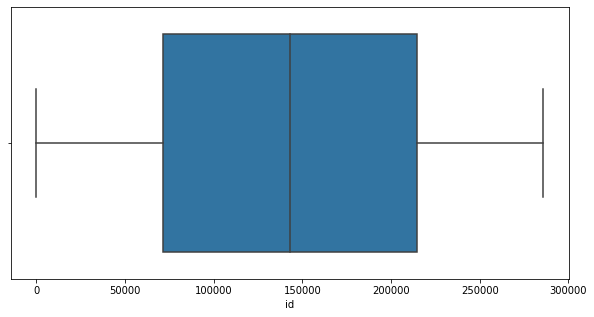

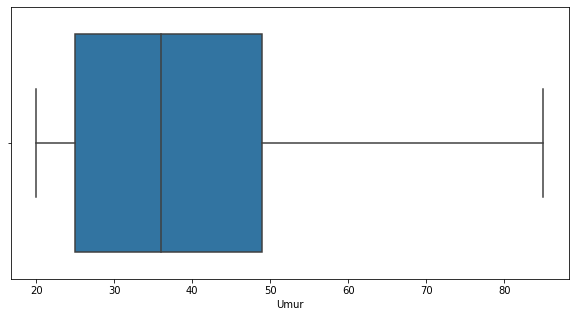

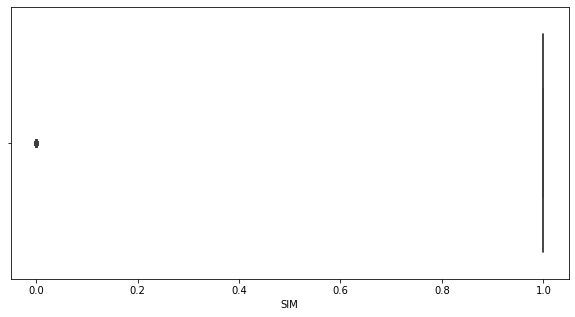

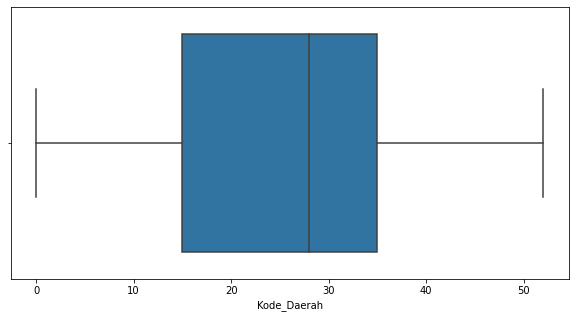

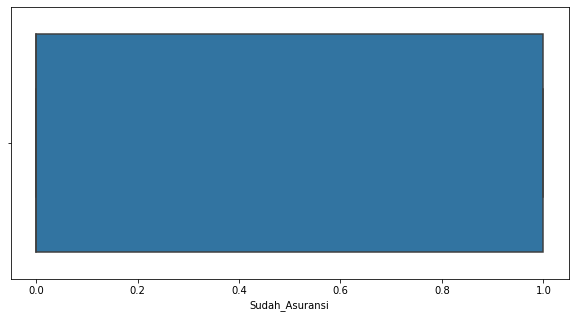

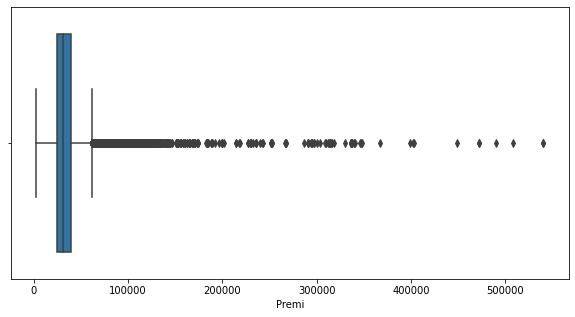

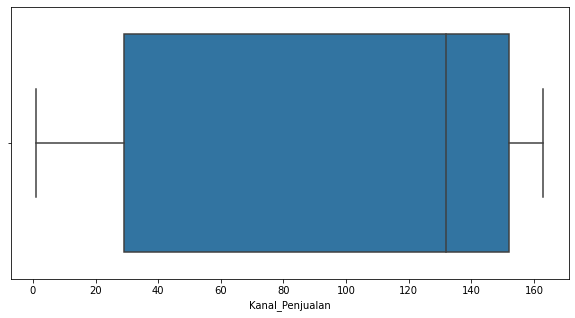

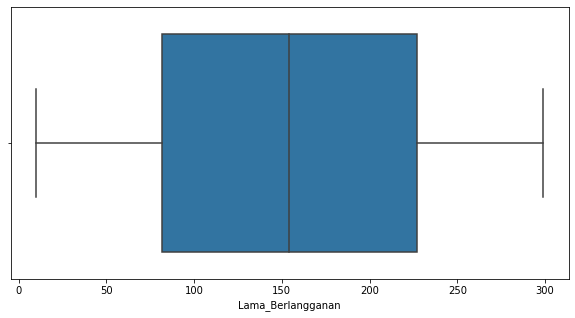

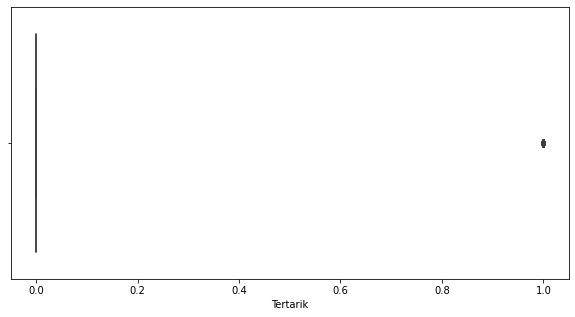

In [ ]:
#boxplot
for feature in df_train.columns:
  if df_train[feature].dtypes == 'object':
    pass
  else:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x=df_train[feature])

#### Data Test

In [ ]:
# Cek outlier pada dataframe test

print("Cek Outlier pada dataframe Test : ")
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3-Q1
Outlier = (df_test < (Q1 - 1.5 * IQR)) | (df_test > (Q3 + 1.5 * IQR))
print(Outlier[Outlier == True].count())

Cek Outlier pada dataframe Test : 
Jenis_Kelamin           0
Kanal_Penjualan         0
Kendaraan_Rusak         0
Kode_Daerah             0
Lama_Berlangganan       0
Premi                1271
SIM                    99
Sudah_Asuransi          0
Tertarik             5861
Umur                    0
Umur_Kendaraan          0
dtype: int64


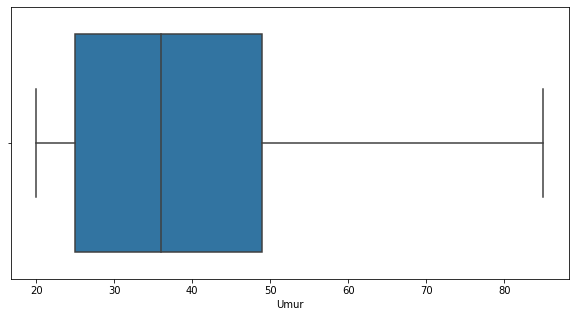

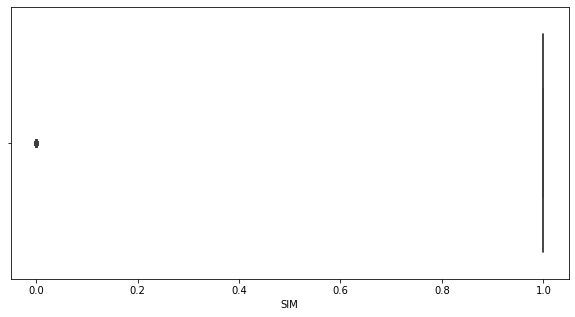

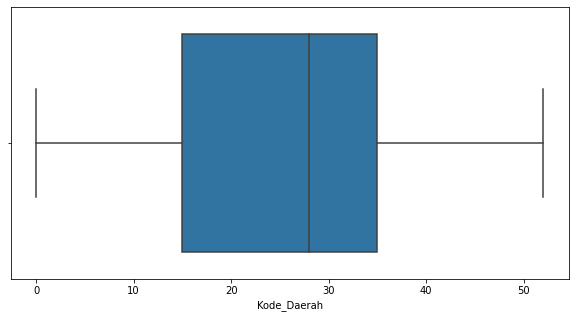

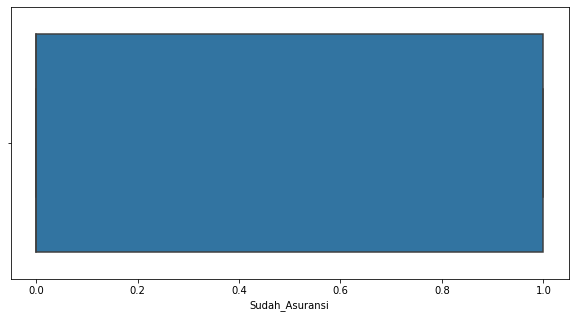

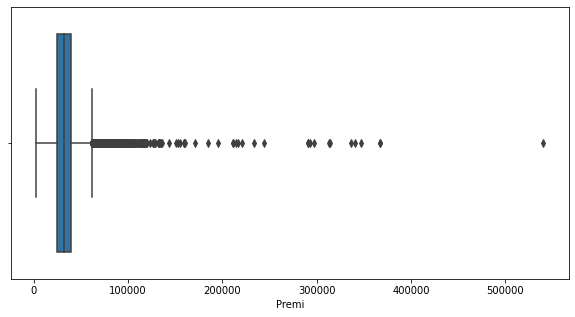

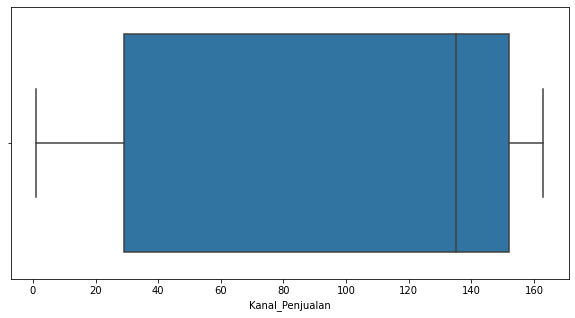

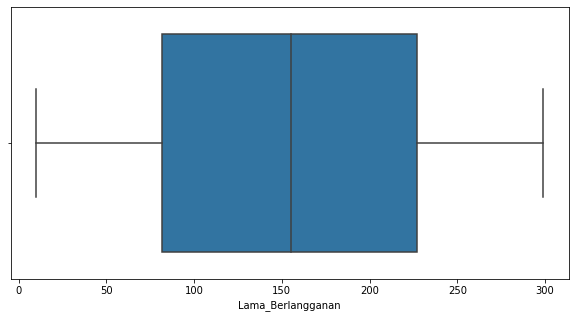

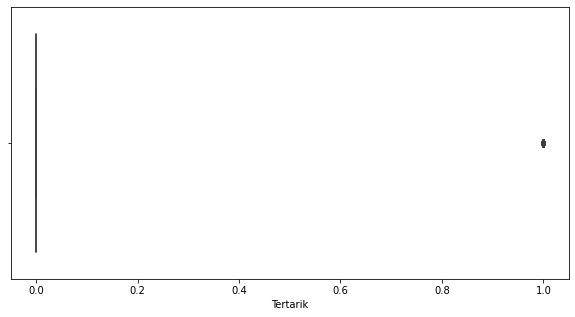

In [ ]:
#boxplot
for feature in df_test.columns:
  if df_test[feature].dtypes == 'object':
    pass
  else:
    plt.figure(figsize = (10, 5))
    sns.boxplot(x=df_test[feature])

### **Check korelasi data raw**

#### Data Train

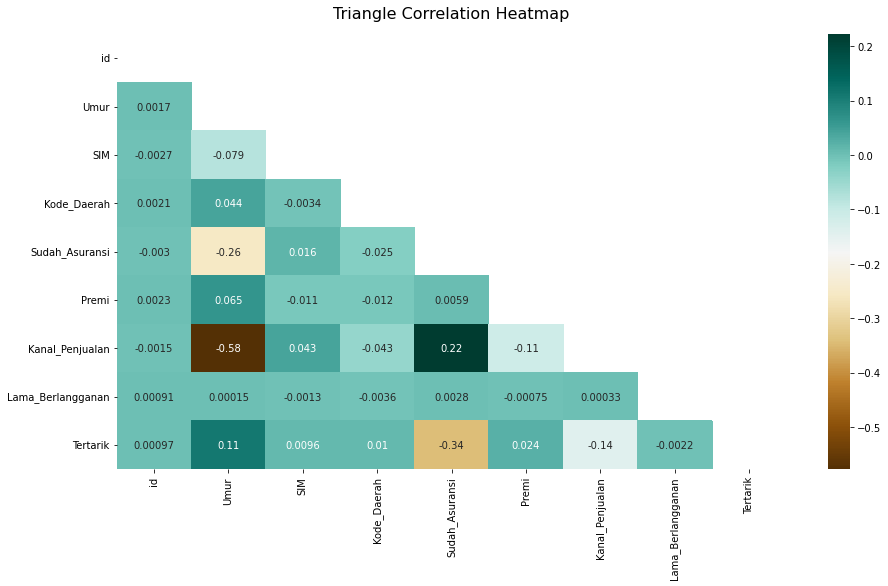

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

#### Data Test

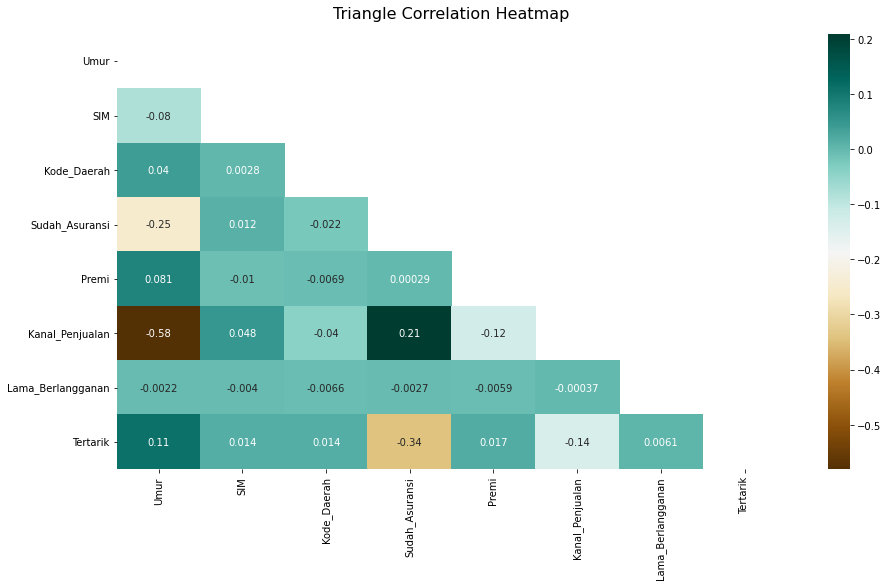

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_test.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_test.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

### **Check Total data**

#### Data Train

In [ ]:
print("Total Dataset :", len(df_train))

Total Dataset : 285831


#### Data Test

In [ ]:
print("Total Dataset :", len(df_test))

Total Dataset : 47639


## **2. Prapemrosesan Data**

### **Parsing Data**

In [ ]:
#Data train
df_proses_train = df_train

#Data test
df_proses_test = df_test

### **Hapus kolom yang tidak diperlukan dari data**

In [ ]:
#Drop colom id pada data train
df_proses_train  = df_proses_train.drop(["id"], axis = 1)
df_proses_train.sample(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
90024,Pria,50.0,1.0,28.0,0.0,1-2 Tahun,NaN,NaN,124.0,199.0,0
280488,Pria,55.0,1.0,46.0,0.0,1-2 Tahun,Pernah,31867.0,26.0,115.0,0
254178,Wanita,24.0,1.0,30.0,1.0,< 1 Tahun,Tidak,23337.0,152.0,256.0,0
196230,Pria,49.0,1.0,45.0,0.0,1-2 Tahun,Pernah,27888.0,26.0,48.0,0
200225,Pria,48.0,1.0,28.0,0.0,1-2 Tahun,Pernah,48939.0,26.0,286.0,0
119054,Wanita,24.0,1.0,27.0,0.0,< 1 Tahun,Pernah,23630.0,152.0,31.0,0
112848,Pria,59.0,1.0,16.0,1.0,1-2 Tahun,Pernah,39663.0,26.0,NaN,0
134943,Wanita,22.0,1.0,46.0,1.0,< 1 Tahun,Tidak,38753.0,152.0,213.0,0
94413,Wanita,24.0,1.0,32.0,1.0,< 1 Tahun,Tidak,28460.0,152.0,205.0,0
41810,Wanita,49.0,1.0,33.0,0.0,1-2 Tahun,Pernah,38966.0,124.0,241.0,1


### **Encode data string -> integer**

#### Data Train

In [ ]:
#Encoder String -> Integer

# Encoder data frame agar semua Data bisa diolah
#Umur kendaraan
df_proses_train['Umur_Kendaraan'] = df_proses_train['Umur_Kendaraan'].replace(['< 1 Tahun'], 0)
df_proses_train['Umur_Kendaraan'] = df_proses_train['Umur_Kendaraan'].replace(['1-2 Tahun'], 1)
df_proses_train['Umur_Kendaraan'] = df_proses_train['Umur_Kendaraan'].replace(['> 2 Tahun'], 2)

# Kendaraan Rusak
df_proses_train['Kendaraan_Rusak'] = df_proses_train['Kendaraan_Rusak'].replace(['Tidak'], 0)
df_proses_train['Kendaraan_Rusak'] = df_proses_train['Kendaraan_Rusak'].replace(['Pernah'], 1)

#Jenis Kelamin
df_proses_train['Jenis_Kelamin'] = df_proses_train['Jenis_Kelamin'].replace(['Wanita'], 0)
df_proses_train['Jenis_Kelamin'] = df_proses_train['Jenis_Kelamin'].replace(['Pria'], 1)

df_proses_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [ ]:
#Mengubah data kategorikal menjadi tipedata object
df_proses_train = df_proses_train.astype({"Jenis_Kelamin": object,"SIM": object, "Kode_Daerah": object, "Sudah_Asuransi": object, "Kanal_Penjualan": object})
df_proses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  object 
 3   Kode_Daerah        271525 non-null  object 
 4   Sudah_Asuransi     271602 non-null  object 
 5   Umur_Kendaraan     271556 non-null  float64
 6   Kendaraan_Rusak    271643 non-null  float64
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  object 
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 24.0+ MB


#### Data Test

In [ ]:
#Encoder String -> Integer

# Encoder data frame agar semua Data bisa diolah
#Umur kendaraan
df_proses_test['Umur_Kendaraan'] = df_proses_test['Umur_Kendaraan'].replace(['< 1 Tahun'], 0)
df_proses_test['Umur_Kendaraan'] = df_proses_test['Umur_Kendaraan'].replace(['1-2 Tahun'], 1)
df_proses_test['Umur_Kendaraan'] = df_proses_test['Umur_Kendaraan'].replace(['> 2 Tahun'], 2)

# Kendaraan Rusak
df_proses_test['Kendaraan_Rusak'] = df_proses_test['Kendaraan_Rusak'].replace(['Tidak'], 0)
df_proses_test['Kendaraan_Rusak'] = df_proses_test['Kendaraan_Rusak'].replace(['Pernah'], 1)

#Jenis Kelamin
df_proses_test['Jenis_Kelamin'] = df_proses_test['Jenis_Kelamin'].replace(['Wanita'], 0)
df_proses_test['Jenis_Kelamin'] = df_proses_test['Jenis_Kelamin'].replace(['Pria'], 1)

df_proses_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,2,1,31039,124,67,0
47635,1,41,1,15,0,1,1,2630,157,232,0
47636,1,24,1,29,1,0,0,33101,152,211,0
47637,1,59,1,30,0,1,1,37788,26,239,1


In [ ]:
#Mengubah data kategorikal menjadi tipedata object
df_proses_test = df_proses_test.astype({"Jenis_Kelamin": object,"SIM": object, "Kode_Daerah": object, "Sudah_Asuransi": object, "Kanal_Penjualan": object})
df_proses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  object
 3   Kode_Daerah        47639 non-null  object
 4   Sudah_Asuransi     47639 non-null  object
 5   Umur_Kendaraan     47639 non-null  int64 
 6   Kendaraan_Rusak    47639 non-null  int64 
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  object
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.0+ MB


### **Menangani missing value**




#### Data Train

In [ ]:
#Menangani Missing values
""" 
Note !!!
Mengganti dengan:
  - "Mean" jika untuk variabel bertipe Numerik.
  - "Mode" jika untuk variabel bertipe kategorikal.
"""

for column in df_proses_train.columns:
  if df_proses_train[column].dtypes == 'object':
    df_proses_train[column].fillna(df_proses_train[column].mode()[0], inplace = True)
  else:
    df_proses_train[column].fillna(df_proses_train[column].mean(), inplace = True)

df_proses_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.000000,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,0.504791,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.000000,30503.0,124.0,270.0,0


### **Menangani outliers**

#### Data Train

In [ ]:
# Mencari Q1,Q2 dan IQR
Q1 = (df_proses_train['Premi']).quantile(0.25)
Q3 = (df_proses_train['Premi']).quantile(0.75)
IQR = Q3 - Q1

# Mencari Minimum dan Maximum Value
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

# Mencari data pencilan di Q3 dan Q1
more_than = (df_proses_train['Premi'] > maximum)
lower_than = (df_proses_train['Premi'] < minimum)

# Menghapus nilai pencilan
df_proses_train['Premi'] = df_proses_train['Premi'].mask(more_than, maximum, axis=0)
df_proses_train['Premi'] = df_proses_train['Premi'].mask(lower_than, minimum, axis=0)

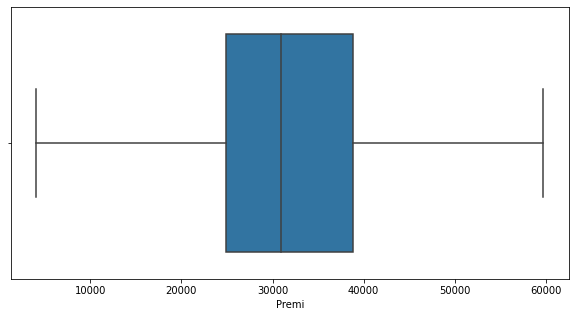

In [ ]:
#Menampilkan bloxplot premi
plt.figure(figsize=(10,5))
sns.boxplot(x=df_proses_train['Premi'])

#### Data Test

In [ ]:
# Mencari Q1,Q2 dan IQR
Q1 = (df_proses_test['Premi']).quantile(0.25)
Q3 = (df_proses_test['Premi']).quantile(0.75)
IQR = Q3 - Q1

# Mencari Minimum dan Maximum Value
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

# Mencari data pencilan di Q3 dan Q1
more_than = (df_proses_test['Premi'] > maximum)
lower_than = (df_proses_test['Premi'] < minimum)

# Menghapus nilai pencilan
df_proses_test['Premi'] = df_proses_test['Premi'].mask(more_than, maximum, axis=0)
df_proses_test['Premi'] = df_proses_test['Premi'].mask(lower_than, minimum, axis=0)

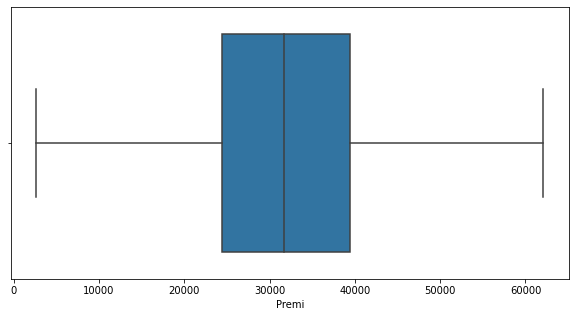

In [ ]:
#Menampilkan bloxplot premi
plt.figure(figsize=(10,5))
sns.boxplot(x=df_proses_test['Premi'])

### **Feature Scaling**

#### Data Train

In [ ]:
#MinMax Scaling
for column in df_proses_train.columns:
  df_proses_train[column] = (df_proses_train[column] - df_proses_train[column].min()) / (df_proses_train[column].max() - df_proses_train[column].min())

df_proses_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.000000,0.430691,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.000000,0.390647,0.172840,0.512111,0.0
2,1.0,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.515198,0.981481,0.377163,0.0
3,0.0,0.584615,1.0,0.923077,0.0,0.5,0.000000,0.000000,0.759259,0.183391,0.0
4,1.0,0.461538,1.0,0.673077,0.0,1.0,0.504791,0.553356,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,0.046154,1.0,0.076923,1.0,0.0,0.000000,0.394025,0.932099,0.716263,0.0
285827,0.0,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.729933,0.932099,0.138408,0.0
285828,0.0,0.046154,1.0,0.961538,1.0,0.0,0.000000,0.820926,0.932099,0.747405,0.0
285829,1.0,0.738462,1.0,0.134615,1.0,0.5,0.000000,0.475137,0.759259,0.899654,0.0


#### Data Test

In [ ]:
#MinMax Scaling
for column in df_proses_test.columns:
  df_proses_test[column] = (df_proses_test[column] - df_proses_test[column].min()) / (df_proses_test[column].max() - df_proses_test[column].min())

df_proses_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,0.446154,1,0.153846,0,0.5,1.0,0.745556,0.154321,0.467128,0.0
1,1,0.030769,1,0.903846,1,0.0,0.0,0.622135,0.932099,0.799308,0.0
2,1,0.061538,1,0.538462,1,0.0,0.0,1.000000,0.932099,0.179931,0.0
3,1,0.400000,1,0.153846,1,0.5,0.0,0.565663,0.759259,0.083045,0.0
4,1,0.230769,1,0.442308,0,0.5,1.0,0.409212,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,0.630769,1,0.884615,0,1.0,1.0,0.477759,0.759259,0.197232,0.0
47635,1,0.323077,1,0.288462,0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,1,0.061538,1,0.557692,1,0.0,0.0,0.512436,0.932099,0.695502,0.0
47637,1,0.600000,1,0.576923,0,0.5,1.0,0.591258,0.154321,0.792388,1.0


### **Drop Duplicate value**

#### Data Train

In [ ]:
# Cek duplikasi data
duplicate = list(df_proses_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 416


In [ ]:
# Menghapus duplikasi data test
df_proses_train.drop_duplicates(inplace=True)

In [ ]:
# Cek duplikasi data
duplicate = list(df_proses_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


#### Data Test

In [ ]:
# Cek duplikasi data
duplicate = list(df_proses_test.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 5


In [ ]:
# Menghapus duplikasi data test
df_proses_test.drop_duplicates(inplace=True)

In [ ]:
# Cek duplikasi data
duplicate = list(df_proses_test.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


## **3. Data Clean**

### Parsing Data

In [ ]:
# Data Train
df_clean_train = df_proses_train

# Data Test
df_clean_test = df_proses_test

### Melihat data

#### Data Train

In [ ]:
#Check Info data
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285415 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285415 non-null  float64
 1   Umur               285415 non-null  float64
 2   SIM                285415 non-null  float64
 3   Kode_Daerah        285415 non-null  float64
 4   Sudah_Asuransi     285415 non-null  float64
 5   Umur_Kendaraan     285415 non-null  float64
 6   Kendaraan_Rusak    285415 non-null  float64
 7   Premi              285415 non-null  float64
 8   Kanal_Penjualan    285415 non-null  float64
 9   Lama_Berlangganan  285415 non-null  float64
 10  Tertarik           285415 non-null  float64
dtypes: float64(11)
memory usage: 26.1 MB


In [ ]:
#Cek missing value
df_clean_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

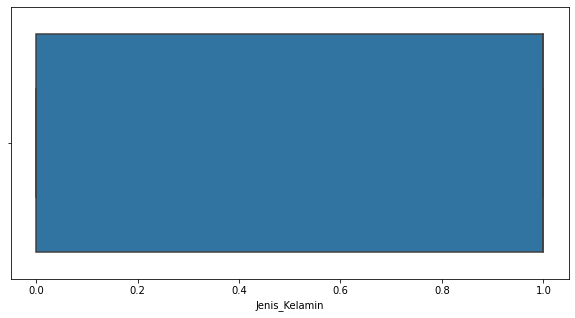

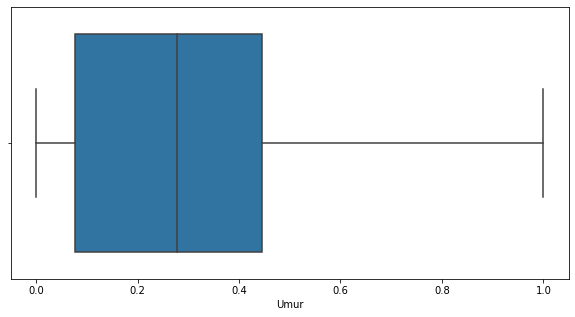

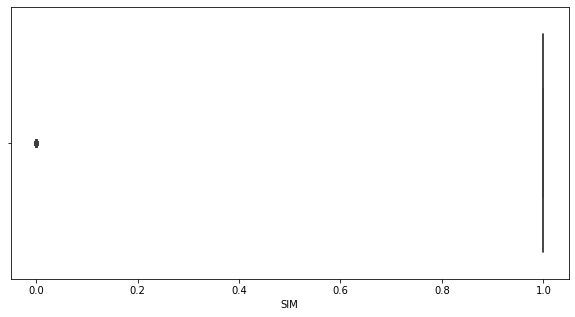

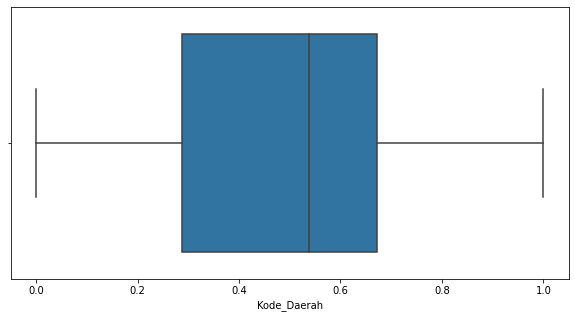

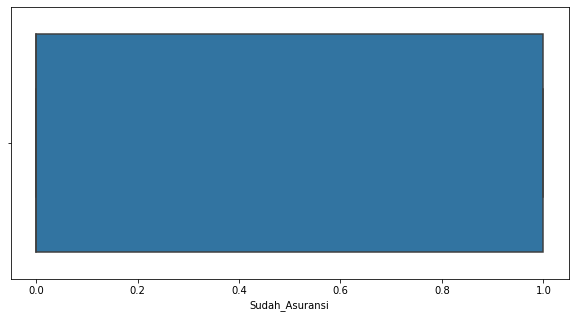

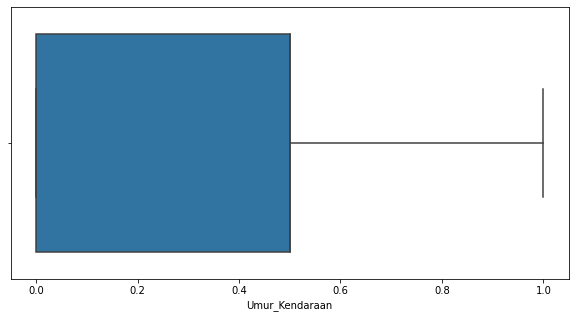

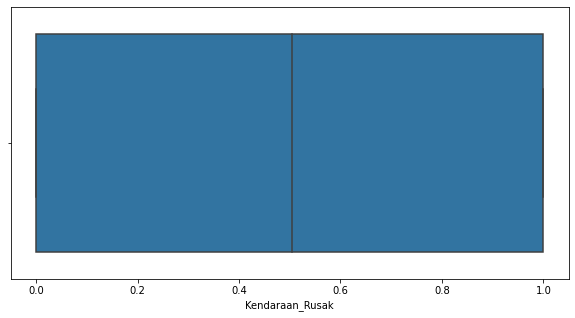

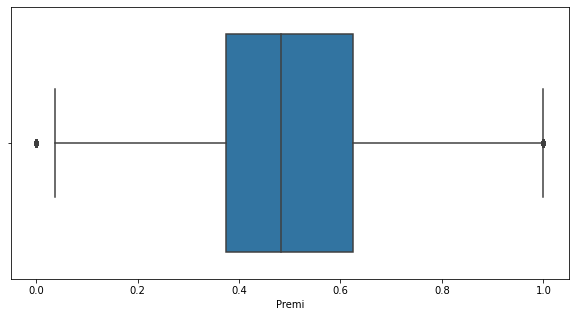

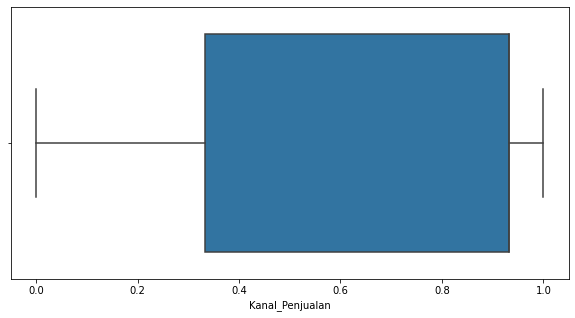

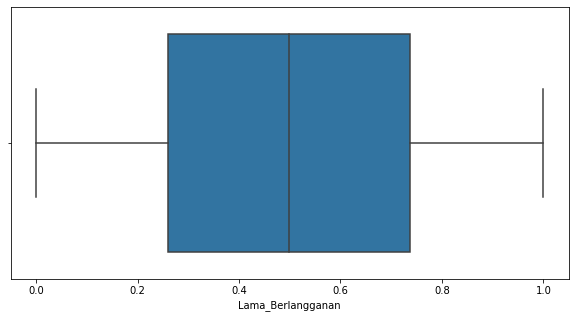

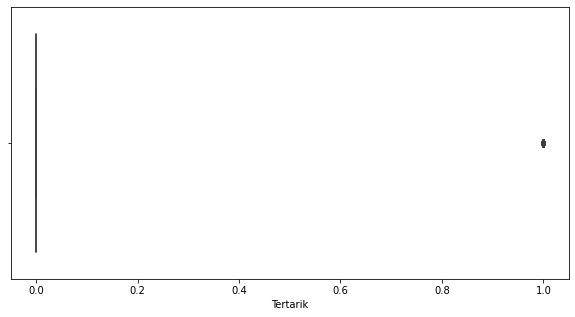

In [ ]:
#Check BoxPlot
for columns in df_clean_train.columns:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=df_clean_train[columns])

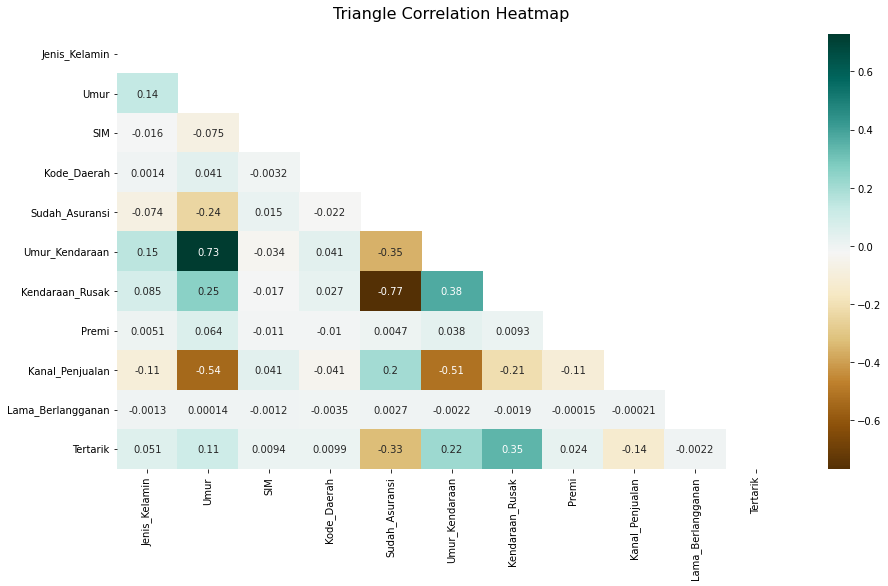

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_clean_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_clean_train.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

0.0    250429
1.0     34986
Name: Tertarik, dtype: int64


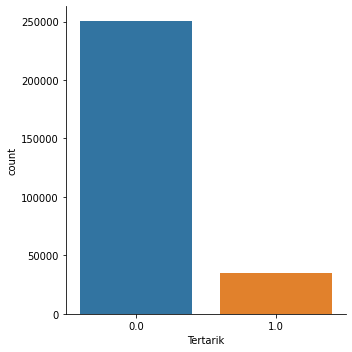

In [ ]:
print(df_clean_train['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df_clean_train, kind='count')

#### Data Test

In [ ]:
#Check Info data
df_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47634 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis_Kelamin      47634 non-null  object 
 1   Umur               47634 non-null  float64
 2   SIM                47634 non-null  object 
 3   Kode_Daerah        47634 non-null  object 
 4   Sudah_Asuransi     47634 non-null  object 
 5   Umur_Kendaraan     47634 non-null  float64
 6   Kendaraan_Rusak    47634 non-null  float64
 7   Premi              47634 non-null  float64
 8   Kanal_Penjualan    47634 non-null  object 
 9   Lama_Berlangganan  47634 non-null  float64
 10  Tertarik           47634 non-null  float64
dtypes: float64(6), object(5)
memory usage: 4.4+ MB


In [ ]:
#Cek missing value
df_clean_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

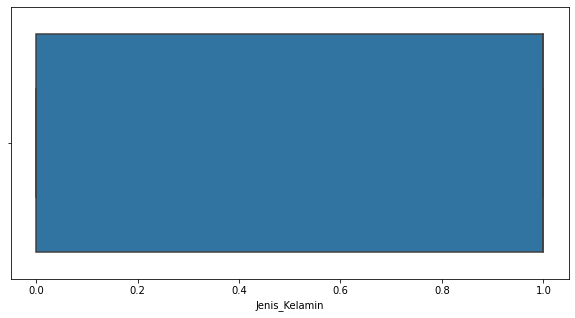

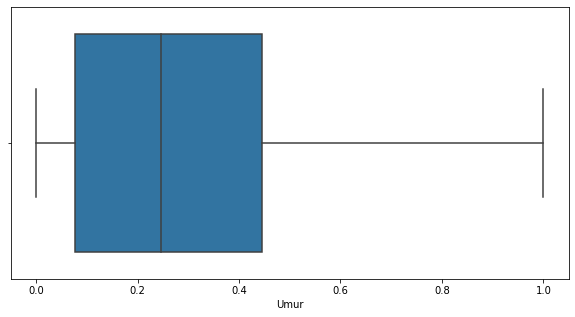

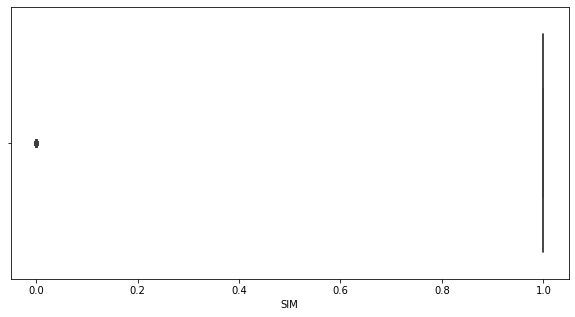

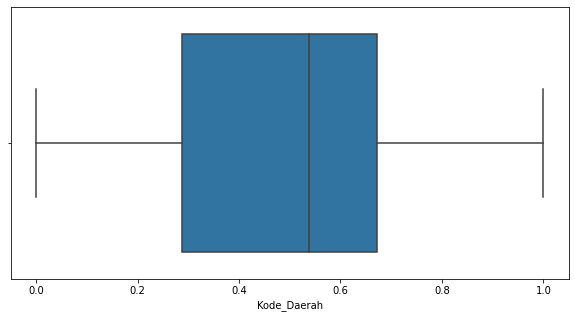

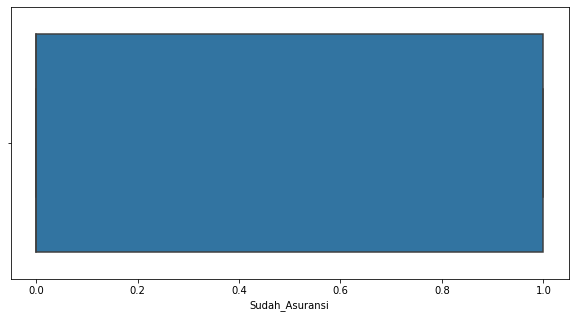

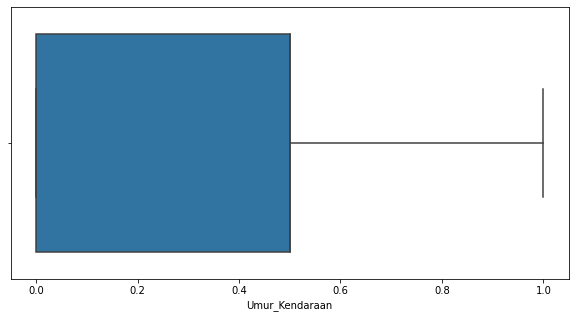

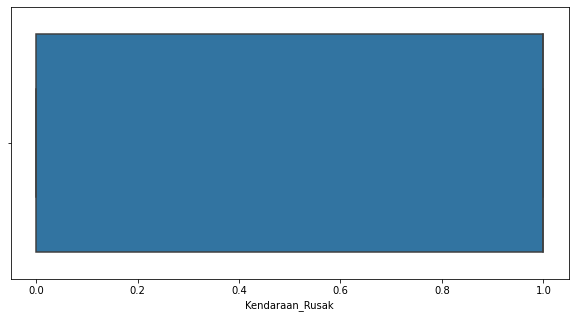

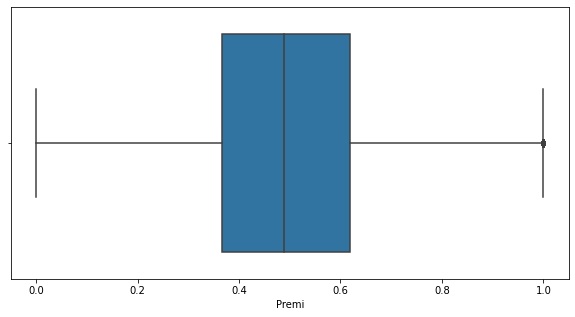

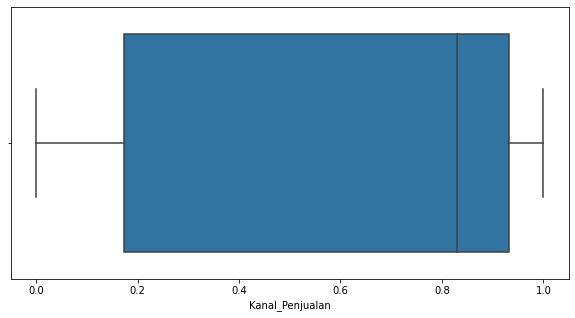

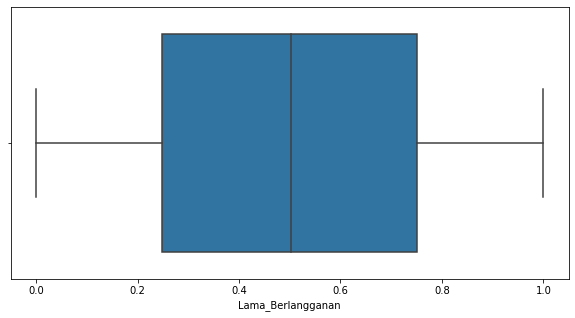

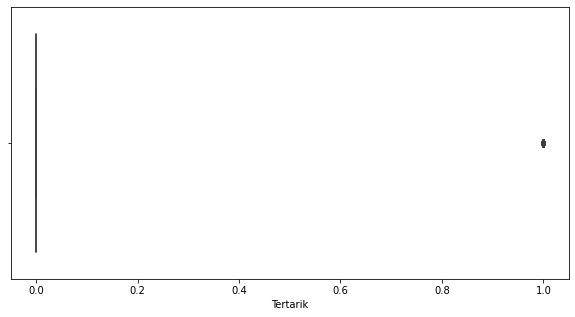

In [ ]:
#Check BoxPlot
for columns in df_clean_test.columns:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=df_clean_test[columns])

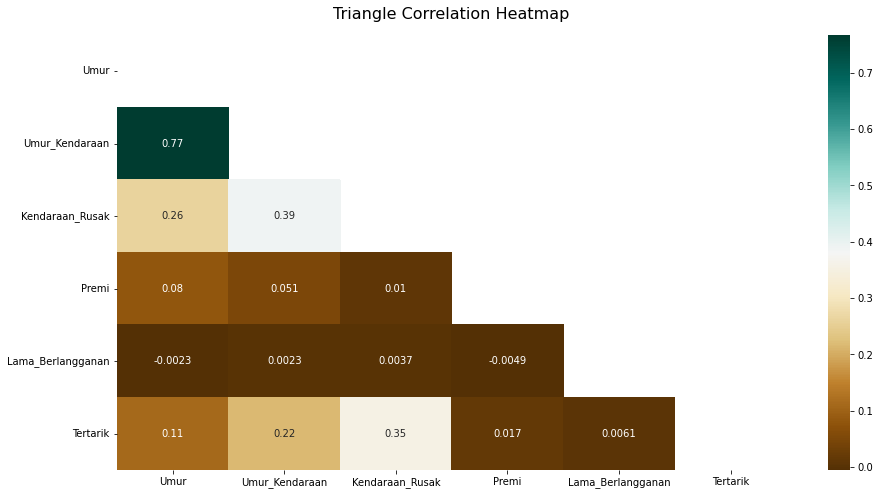

In [ ]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df_clean_test.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_clean_test.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

0.0    41775
1.0     5859
Name: Tertarik, dtype: int64


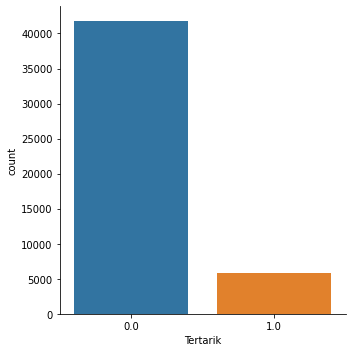

In [ ]:
print(df_clean_test['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df_clean_test, kind='count')

## **Classification**

In [ ]:
#split dataset in features and target variable
x = df_clean_train.drop("Tertarik", axis=1) # Features
y = df_clean_train["Tertarik"] # Target variable

In [ ]:
# Split dataset into training set and test set
x_train, x_val, y_train, y_val  = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')

x_train shape: (228332, 10)
x_test shape: (57083, 10)
---------------------------------
y_train shape: (228332,)
y_test shape: (57083,)


### Tuning Model

In [ ]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'Random Forest',
]

### Melatih Model Machine Learning

In [ ]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [ ]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    f1 = f1_score(y_test, result)
    recall = recall_score(y_test, result)
    precision = precision_score(y_test, result)
    roc = roc_auc_score(y_test, result)
    accuracy = accuracy_score(y_test, result)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy

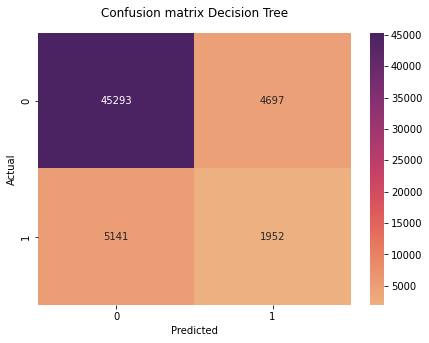

F1-Score 	: 0.28409256294571383
Recall 		: 0.27520090229804034
Precision 	: 0.29357798165137616
ROC-AUC 	: 0.5906210552698444
Accuracy 	: 0.8276544680552879



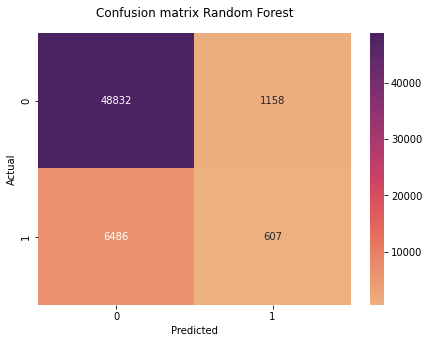

F1-Score 	: 0.13705125310453825
Recall 		: 0.08557732976173692
Precision 	: 0.34390934844192633
ROC-AUC 	: 0.5312063484175757
Accuracy 	: 0.8660897289911182



In [ ]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [ ]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
0,Decision Tree,0.284093,0.275201,0.293578,0.590621,0.827654
1,Random Forest,0.137051,0.085577,0.343909,0.531206,0.866090


### Memprediksi Dan Evaluasi Data Test

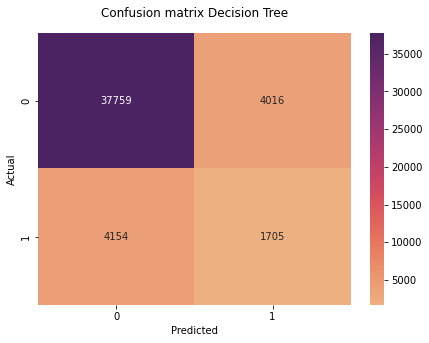

F1-Score 	: 0.29447322970639034
Recall 		: 0.291005291005291
Precision 	: 0.2980248208355183
ROC-AUC 	: 0.5974356197695515
Accuracy 	: 0.8284838560691943



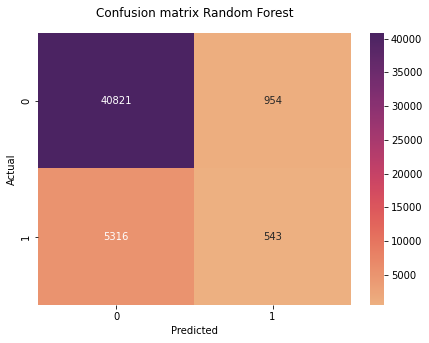

F1-Score 	: 0.14763458401305057
Recall 		: 0.09267793138760881
Precision 	: 0.3627254509018036
ROC-AUC 	: 0.5349206533060127
Accuracy 	: 0.8683713314019398



In [ ]:
y_test = df_clean_test.Tertarik
x_test = df_clean_test.drop(["Tertarik"], axis = 1)

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

In [ ]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
0,Decision Tree,0.294473,0.291005,0.298025,0.597436,0.828484
1,Random Forest,0.147635,0.092678,0.362725,0.534921,0.868371
